<a href="https://colab.research.google.com/github/eathon/DeepLearningwithPython/blob/master/hyperas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 調參工具  Hyperas
 
## Dataset - Fashion-MNIST

![alt text](https://cdn-images-1.medium.com/max/1000/1*QQVbuP2SEasB0XAmvjW0AA.jpeg)

# Code

In [0]:
# sudo pip3 install --ignore-installed --upgrade tensorflow
from __future__ import print_function
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
KTF.set_session(session)
import keras
#import tensorflow as tf
print(keras.__version__)
print(tf.__version__)
# To ignore keep_dims warning
tf.logging.set_verbosity(tf.logging.ERROR)



Using TensorFlow backend.


2.2.4
1.12.0


In [0]:
# 安裝套件

!pip install hyperas
!pip install hyperopt

    100% |████████████████████████████████| 122kB 10.4MB/s 
    100% |████████████████████████████████| 409kB 15.7MB/s 
    100% |████████████████████████████████| 122kB 37.7MB/s 
    100% |████████████████████████████████| 112kB 35.0MB/s 
    100% |████████████████████████████████| 348kB 34.4MB/s 
    100% |████████████████████████████████| 2.2MB 13.8MB/s 
  Running setup.py bdist_wheel for hyperas ... - done
  Stored in directory: /root/.cache/pip/wheels/06/38/3f/27826f57fae60ef788ceb47e2c649590ab8af31f42075325d2
Successfully built hyperas
ipython 5.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.4, but you'll have prompt-toolkit 2.0.7 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.15
    Uninstalling prompt-toolkit-1.0.15:
      Successfully uninstalled prompt-toolkit-1.0.15


In [0]:
! rm -rf hyperas.ipynb

In [0]:
# See: https://stackoverflow.com/questions/49920031/get-the-path-of-the-notebook-on-google-colab
# Install the PyDrive wrapper & import libraries.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Copy/download the file
fid = drive.ListFile({'q':"title='hyperas.ipynb'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('hyperas.ipynb')

In [0]:
! ls -al

total 100
drwxr-xr-x 1 root root  4096 Dec  8 14:37 .
drwxr-xr-x 1 root root  4096 Dec  8 14:35 ..
-rw-r--r-- 1 root root  2520 Dec  8 14:37 adc.json
drwxr-xr-x 1 root root  4096 Dec  8 14:37 .config
-rw-r--r-- 1 root root 72919 Dec  8 14:37 hyperas.ipynb
drwxr-xr-x 2 root root  4096 Dec  5 17:39 sample_data


### Best model:
{'Activation': 0, 
'Activation_1': 0, 'Dense': 2, 'Dense_1': 2, 'Dense_2': 3, 'Dropout': 0.020862912321193482, 'Dropout_1': 0.0910332772894481, 'Dropout_2': 0.8618283661109736, 'batch_size': 0, 'choiceval': 2, 'conditional': 0, 'lr': 0, 'lr_1': 1, 'lr_2': 0}


Data function
4423680/4422102 [==============================] - 1s 0us/step
(48000, 28, 28)
Training sample 0 : class: 3 , one-hot encoded: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Training sample 1 : class: 6 , one-hot encoded: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Training sample 2 : class: 4 , one-hot encoded: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Training sample 3 : class: 7 , one-hot encoded: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Training sample 4 : class: 4 , one-hot encoded: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Training sample 5 : class: 9 , one-hot encoded: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Training sample 6 : class: 0 , one-hot encoded: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Training sample 7 : class: 9 , one-hot encoded: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Training sample 8 : class: 0 , one-hot encoded: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Training sample 9 : class: 3 , one-hot encoded: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
(10000, 10)
Val set
(12000, 784)
(12000, 10)
>>> Imports:
#coding=utf-8

from __future__ import print_funct

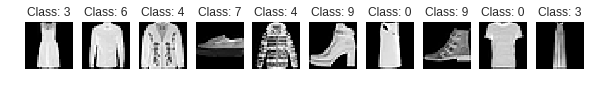

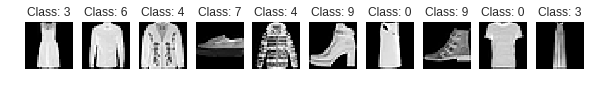

In [0]:

from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential


from hyperas import optim
from hyperas.distributions import choice, uniform, conditional

import matplotlib.pyplot as plt
from keras.utils import np_utils
from hyperopt import Trials, STATUS_OK, tpe
  
from keras import backend as K

import seaborn as sns



X_test_global = None
Y_test_global = None


def data():
  
 
  from keras.datasets import fashion_mnist
  from keras.datasets import mnist
  from sklearn.model_selection import train_test_split

  from keras.layers.core import Dense, Dropout, Activation
  from keras.models import Sequential


  from hyperas import optim
  from hyperas.distributions import choice, uniform, conditional
  from keras import backend as K

  import seaborn as sns

  sns.set()
  
  print('Data function')
  img_rows, img_cols = 28, 28
  nb_classes = 10
  (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state=12345)

  pltsize=1
  
  print (X_train.shape)
  
  Y_train = np_utils.to_categorical(y_train, nb_classes)
  Y_val = np_utils.to_categorical(y_val, nb_classes)
  Y_test= np_utils.to_categorical(y_test, nb_classes)
  
  
  plt.figure(figsize=(10*pltsize, pltsize))

  for i in range(10):

    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[i,:,:], cmap="gray")
    plt.title('Class: '+str(y_train[i]))
    print('Training sample',i,': class:',y_train[i], ', one-hot encoded:', Y_train[i])


  X_train = X_train.reshape(X_train.shape[0], 784)
  X_val = X_val.reshape(X_val.shape[0], 784)
  X_test = X_test.reshape(X_test.shape[0], 784)
  X_train = X_train.astype('float32')
  X_val = X_val.astype('float32')
  X_test = X_test.astype('float32')
  X_train /= 255
  X_val /= 255
  X_test/= 255
  
  global X_test_global
  X_test_global = X_test
  global Y_test_global
  Y_test_global= Y_test
  
  print (Y_test_global.shape)
  
  return X_train, Y_train, X_val, Y_val



def create_model(X_train, Y_train, X_val, Y_val):
    """
    Model providing function:

    Create Keras model with double curly brackets dropped-in as needed.
    Return value has to be a valid python dictionary with two customary keys:
        - loss: Specify a numeric evaluation metric to be minimized
        - status: Just use STATUS_OK and see hyperopt documentation if not feasible
    The last one is optional, though recommended, namely:
        - model: specify the model just created so that we can later use it again.
    
    {'Activation': 0, 
    'Activation_1': 0, 
    'Dense': 2, 'Dense_1': 2, 'Dense_2': 3, 
    'Dropout': 0.020862912321193482, 'Dropout_1': 0.0910332772894481, 'Dropout_2': 0.8618283661109736, 
    'batch_size': 0, 
    'choiceval': 2, 'conditional': 0, 'lr': 0, 'lr_1': 1, 'lr_2': 0}
    """
    model = Sequential()
    #layer 1
    model.add(Dense({{choice([128, 256, 512, 1024])}}, input_shape=(784,)))
    model.add(Activation('relu'))
    model.add(Dropout({{uniform(0, 1)}}))
    
    # layer 2
    model.add(Dense({{choice([128, 256, 512, 1024])}}))
    model.add(Activation({{choice(['relu', 'sigmoid'])}}))
    model.add(Dropout({{uniform(0, 1)}}))
    
    # layer 3
    if conditional({{choice(['two', 'three'])}}) == 'three':
        model.add(Dense({{choice([128, 256, 512, 1024])}}))
        model.add(Activation({{choice(['relu', 'sigmoid'])}}))
        model.add(Dropout({{uniform(0, 1)}}))
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    
    adam = keras.optimizers.Adam(lr={{choice([10**-3, 10**-4])}})
    rmsprop = keras.optimizers.RMSprop(lr={{choice([10**-3, 10**-4])}})
    sgd = keras.optimizers.SGD(lr={{choice([10**-3, 10**-4])}})
   
    choiceval = {{choice(['adam', 'sgd', 'rmsprop'])}}
    if choiceval == 'adam':
        optim = adam
    elif choiceval == 'rmsprop':
        optim = rmsprop
    else:
        optim = sgd
        

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
                  optimizer=optim)

    model.fit(X_train, Y_train,
              batch_size={{choice([32, 64, 128])}},
              epochs=5,
              verbose=2,
              validation_data=(X_val, Y_val))
    score, acc = model.evaluate(X_val, Y_val, verbose=0)
    print('Test accuracy:', acc)
    
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}


if __name__ == '__main__':
    notebook_name='hyperas'
    
    X_train, Y_train, X_val, Y_val = data()
    print ('Val set')
    print (X_val.shape)
    print (Y_val.shape)
    best_run, best_model = optim.minimize(model=create_model,
                                          data=data,
                                          algo=tpe.suggest,
                                          max_evals=30,
                                          trials=Trials(),
                                          notebook_name=notebook_name)
    print (best_model.summary())
    print("Evalutation of best performing model:")
    print(best_model.evaluate(  X_test_global, Y_test_global))
    print("Best performing model chosen hyper-parameters:")
    print(best_run)

In [0]:
!py3clean .

In [0]:
! cat temp_model.py

cat: temp_model.py: No such file or directory
